In [21]:
import xarray
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import glob

In [22]:
for file_name in glob.glob('/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/*'):
    print(file_name)

/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20450101_20451231_diad_T.nc
/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20810101_20811231_diad_T.nc
/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20630101_20631231_diad_T.nc
/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20820101_20821231_diad_T.nc
/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20600101_20601231_diad_T.nc
/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20460101_20461231_diad_T.nc
/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_202901

In [23]:
list_netcdf = []
for file_name in glob.glob("/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/*.nc"):
    list_netcdf.append(file_name)

In [24]:
ds = xarray.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/*.nc')

In [25]:
lats = ds.variables['nav_lat'][:]
lons = ds.variables['nav_lon'][:]
time = ds.variables['time_counter'][:]
ph = ds.variables['ph'][:]
co2flux = ds.variables['co2flux_cpl'][:].squeeze()

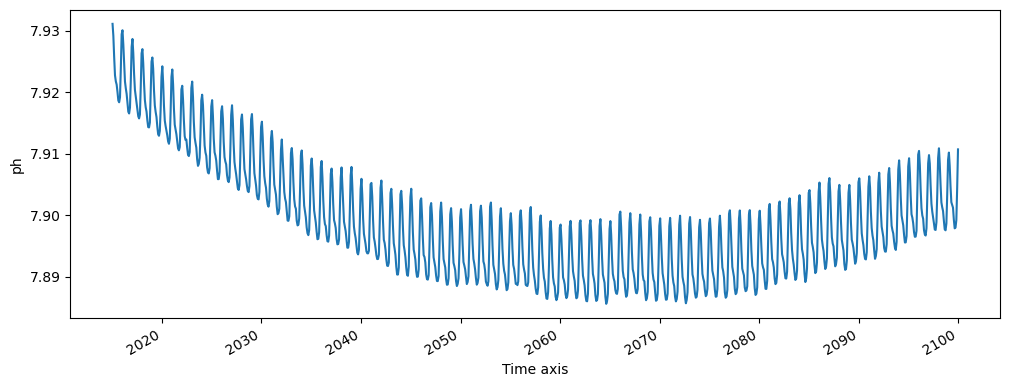

In [26]:
ds.ph.mean(dim=('y', 'x')).plot(figsize= (12, 4)) # global mean for pH without OAE

In [8]:
df = ds.sel(time_counter=slice('2080', '2090'))

In [9]:
dataframe = df.to_dataframe()

In [10]:
dataframe.head()

time_counter_bnds  nav_lon    nav_lat  co2flx  \
time_counter        bnds y x                                                 
2080-01-16 12:00:00 0    0 0        2080-01-01    72.75 -77.010475     0.0   
                           1        2080-01-01    73.25 -77.010475     0.0   
                           2        2080-01-01    73.75 -77.010475     0.0   
                           3        2080-01-01    74.25 -77.010475     0.0   
                           4        2080-01-01    74.75 -77.010475     0.0   

                                    ph  co2flux_cpl  
time_counter        bnds y x                         
2080-01-16 12:00:00 0    0 0  7.751746          0.0  
                           1  7.751746          0.0  
                           2  7.751746          0.0  
                           3  7.751746          0.0  
                           4  7.751746          0.0

In [11]:
dataframe.describe()

,nav_lon,nav_lat,co2flx,ph,co2flux_cpl
count,9.740069e+07,9.740069e+07,9.740069e+07,9.740069e+07,9.740069e+07
mean,-1.020709e+00,5.111142e-01,-6.616154e-10,2.755991e+00,-4.307477e-10
std,7.512882e+01,3.756418e+01,1.930862e-09,2.347761e+00,1.964308e-09
min,-1.799970e+02,-7.701048e+01,-2.775559e-08,5.555725e+00,-2.189073e-08
25%,-9.518312e+01,-5.194667e+01,-1.387484e-09,7.751746e+00,-1.286781e-09
50%,2.482575e+00,2.998630e+00,0.000000e+00,7.963301e+00,0.000000e+00
75%,8.425000e+01,5.047917e+01,0.000000e+00,8.001985e+00,1.989225e-10
max,1.799988e+02,8.988536e+01,6.038194e-08,8.307158e+00,4.796734e-08


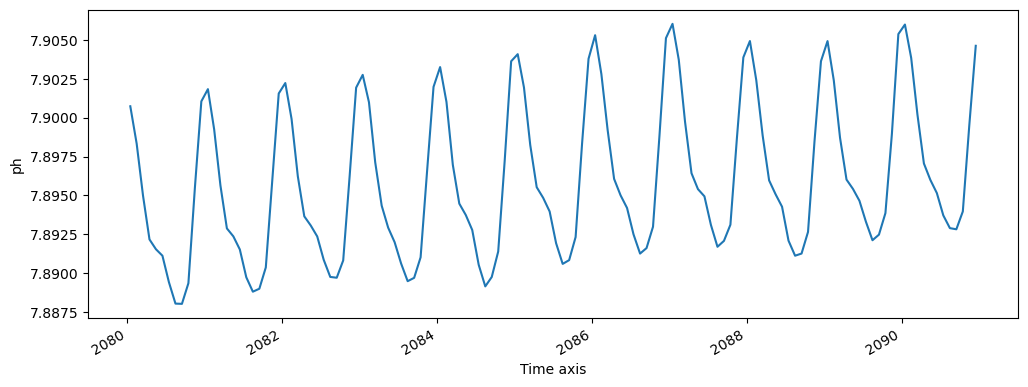

In [12]:
df.ph.mean(dim=('y', 'x')).plot(figsize= (12, 4))

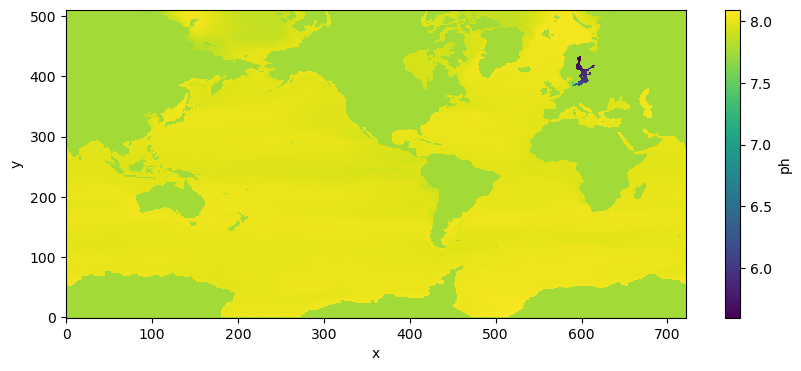

In [13]:
ds.ph.mean(dim=('time_counter')).plot(figsize = (10, 4))

In [27]:
sliced_data = ds.where((-40 < ds.nav_lon) & (ds.nav_lon < 40) & (20 < ds.nav_lat) & (ds.nav_lat < 80), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarr

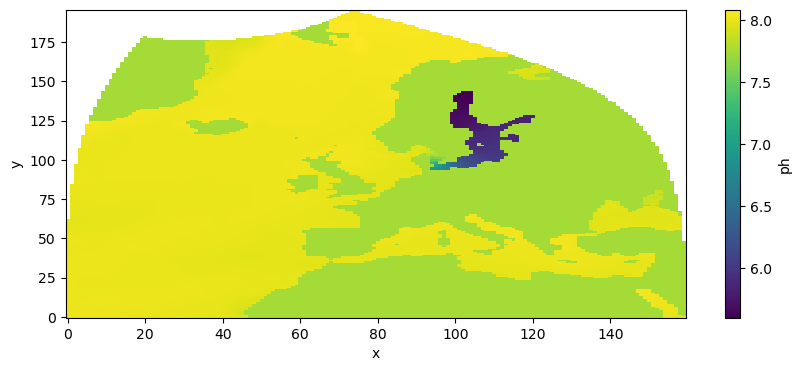

In [15]:
sliced_data.ph.mean(dim=('time_counter')).plot(figsize = (10, 4))

Text(0.5, 1.02, 'pH')

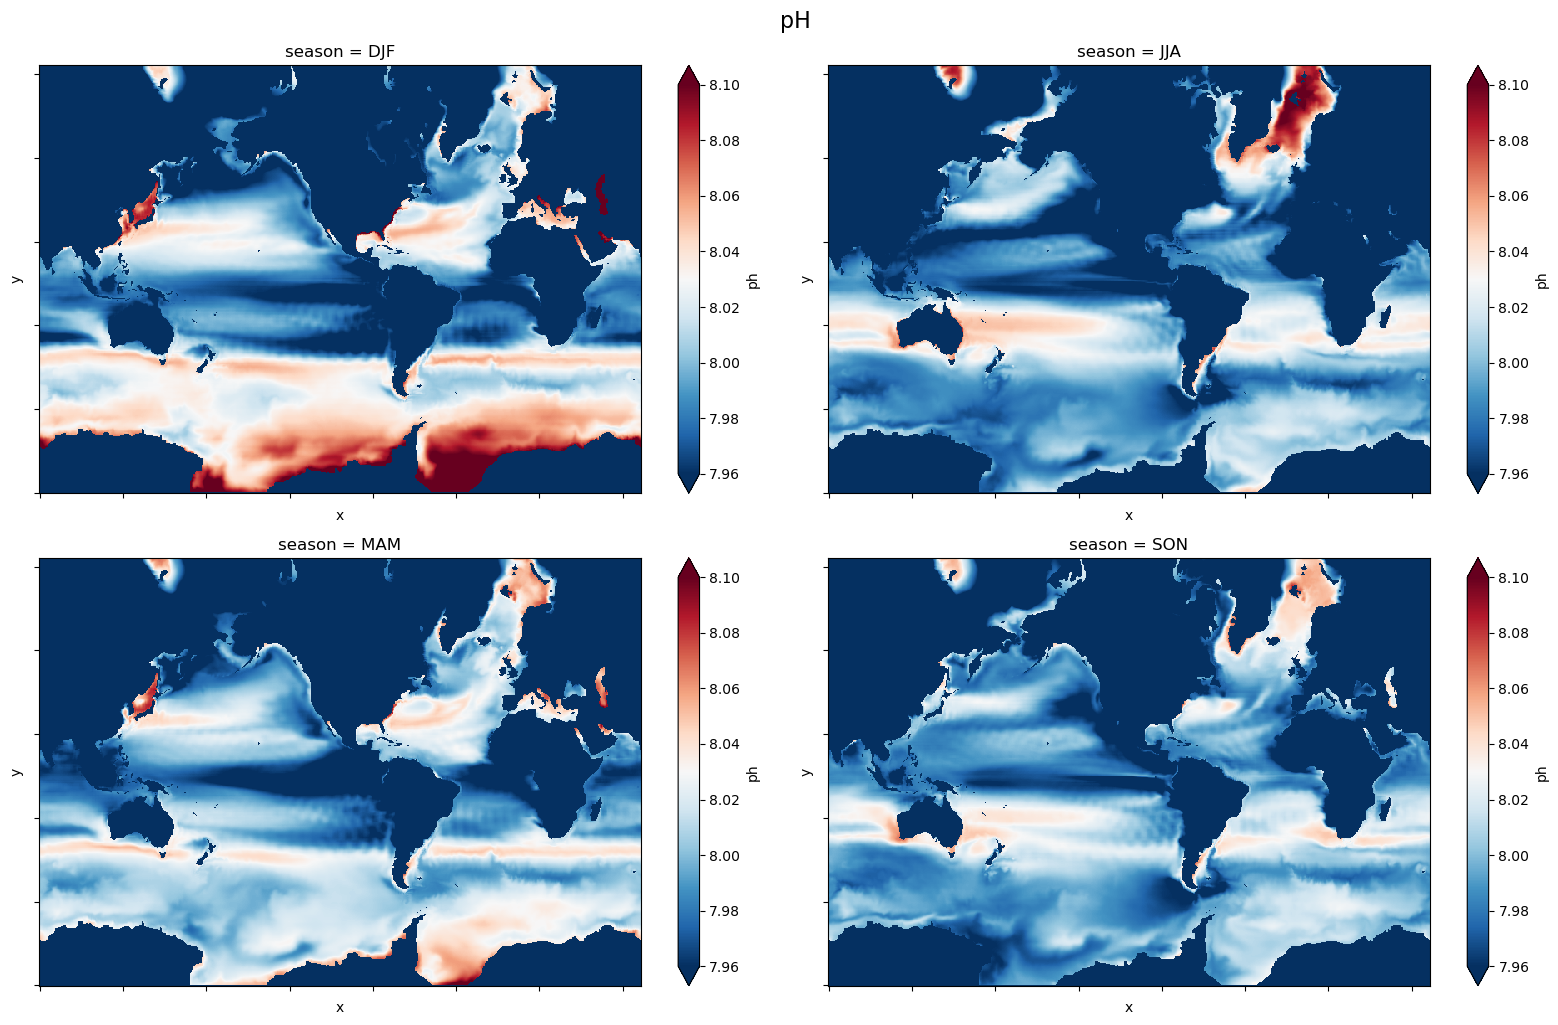

In [16]:
ds_season = ds.ph.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=7.96, vmax=8.1, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('pH', fontsize=16, y=1.02)

In [17]:
sliced_data_frame = df.where((-40 < ds.nav_lon) & (ds.nav_lon < 40) & (20 < ds.nav_lat) & (ds.nav_lat < 80), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarr

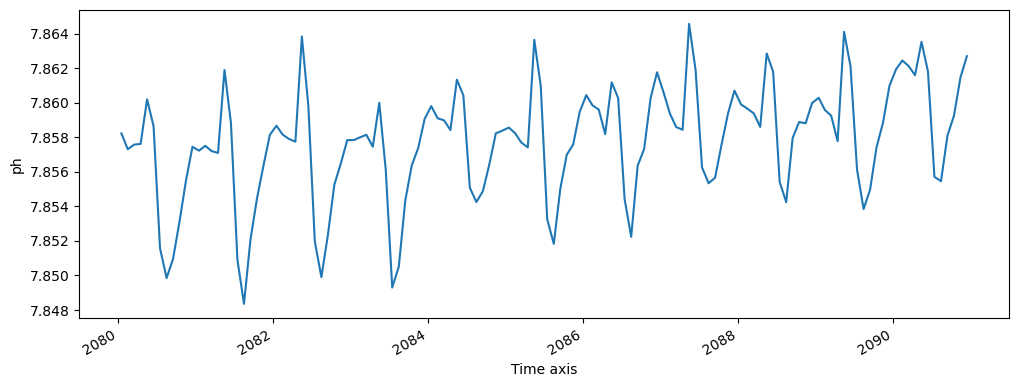

In [18]:
sliced_data_frame.ph.mean(dim=('y', 'x')).plot(figsize= (12, 4))

In [19]:
df_frame = sliced_data_frame.to_dataframe()

In [20]:
df_frame.describe()

,co2flx,ph,co2flux_cpl,nav_lon,nav_lat
count,6.891984e+06,6.891984e+06,6.891984e+06,8.279040e+06,8.279040e+06
mean,-9.529735e-10,7.951878e+00,-8.664138e-10,4.899652e+00,5.322528e+01
std,2.381819e-09,2.923667e-01,2.380504e-09,2.807441e+01,1.653617e+01
min,-2.775559e-08,5.555725e+00,-1.376714e-08,-7.449424e+01,2.007611e+01
25%,-1.981704e-09,7.751746e+00,-2.361094e-09,-1.873509e+01,4.030293e+01
50%,0.000000e+00,7.945200e+00,0.000000e+00,6.208928e+00,5.491193e+01
75%,0.000000e+00,8.009722e+00,0.000000e+00,2.865493e+01,6.630396e+01
max,2.303973e-08,8.197928e+00,1.683164e-08,6.409957e+01,8.463253e+01


In [28]:
start_date = "2020-01-01"
end_date = "2100-01-01"

ph_flux = sliced_data["ph"].sel(time_counter=slice(start_date, end_date))

In [29]:
ph_season_summary = ph_flux.groupby('time_counter.season').mean('time_counter', skipna=True)

In [30]:
ph_season_mean_all_years = ph_flux.resample(time_counter='QS-DEC', keep_attrs=True).mean()

/opt/anaconda3/lib/python3.9/site-packages/xarray/core/common.py:1127: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  warnings.warn(


In [31]:
ph_seasonal_mean = ph_season_mean_all_years.groupby('time_counter').mean(["y", "x"])

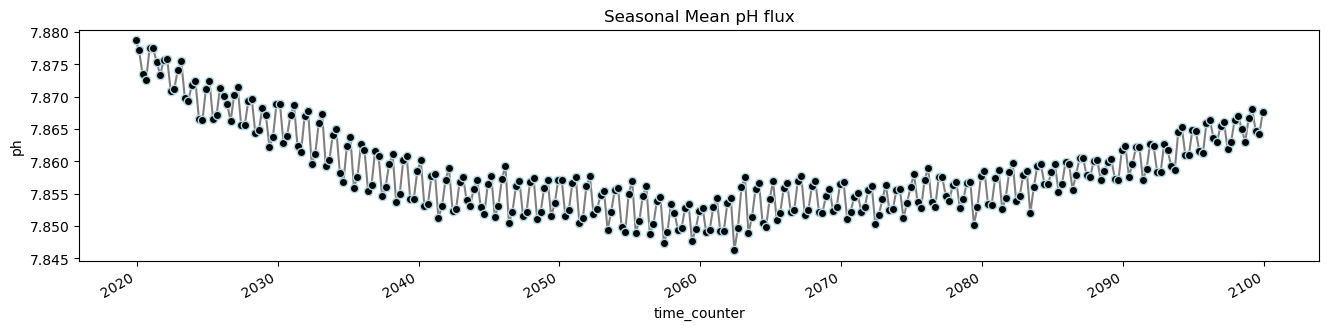

In [32]:
f, ax = plt.subplots(figsize=(16, 3))
ph_seasonal_mean.plot(marker="o",
                        color="grey",
                        markerfacecolor="black",
                        markeredgecolor="lightblue")
ax.set(title="Seasonal Mean pH flux")
plt.show()

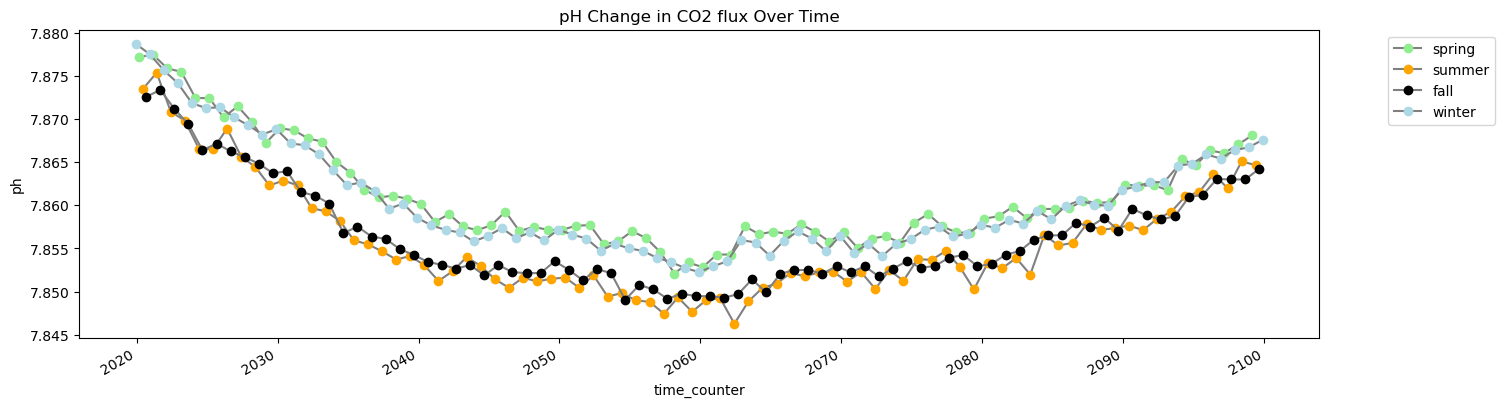

In [33]:
colors = {3: "lightgreen", 6: "orange", 9: "black", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in ph_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="grey",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor=colors[month],
             label=seasons[month])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title="pH Change in CO2 flux Over Time")
plt.show()